# Problem Statement: Evaluation of Hospital Bed Availability Across Indian States
**Project ID:** CBIT/IT-1/EDAV/2025/CEP-02

**Roll No:** 1601-24-737-305  

**Name of the Student:** Syed Mubeen

**Department:** Information Technology

**Institution:** Chaitanya Bharathi Institute of Technology (CBIT), Hyderabad

## Problem Overview

The goal of this project is to evaluate the availability of hospital beds across various Indian states over multiple years.  
We will analyze trends in hospital infrastructure, urban–rural distribution, and year-wise changes using Python libraries.

The analysis includes:
1. Calculating the mean number of hospital beds per state using NumPy.  
2. Extracting and comparing data for **urban vs rural** hospitals using Pandas.  
3. Handling missing data for beds using intelligent imputation techniques.  
4. Aggregating hospital bed data by **state and year** to analyze trends.  
5. Visualizing hospital bed availability using **Seaborn bar plots**.

## Dataset Information

**Dataset Name:** hospital_beds_data.csv  
**Dataset Source:** *Self-created dataset (randomly generated for analysis)*  
[📂 Click here to open dataset in Drive](https://drive.google.com/file/d/1l2xoA-JeDbM0u2CIW8oKBl-g_m5WPqow/view?usp=drive_link)

## Environment & Libraries

**Python Version:** 3.x (Tested on Google Colab)

**Libraries Used:**
- `numpy` → Numerical computations  
- `pandas` → Data manipulation and cleaning  
- `matplotlib` → Basic visualization  
- `seaborn` → Statistical data visualization  
- `random` → For synthetic data generation


## Q1: Calculate Mean Beds per State using NumPy (Bloom’s Level: 3)

We’ll load the dataset, take the `Beds_Available` column, and calculate the mean value for each state.


In [2]:
import pandas as pd
import numpy as np

#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
file_path = "/content/drive/My Drive/BE/1601-24-737-305/PROJECT/hospital_beds_data.csv"
df = pd.read_csv(file_path)

# Display few rows
print("Dataset preview:")
print(df.head())

# Group by State and calculate mean using NumPy
mean_beds = df.groupby('State')['Beds_Available'].apply(np.nanmean)

# Display results
print("\nAverage number of beds per state:")
print(mean_beds)


Mounted at /content/drive
Dataset preview:
       State  Year Hospital_Type  Hospitals  Beds_Available  Beds_Occupied  \
0  Telangana  2020         Urban        106          3031.0           1888   
1  Telangana  2020         Rural         64          3689.0           2357   
2  Telangana  2021         Urban        245          6245.0           2928   
3  Telangana  2021         Rural        291         14719.0          12643   
4  Telangana  2022         Urban        144          5299.0           2181   

   Population_Covered Region  
0             2009120  South  
1             1185175  South  
2             1950668  South  
3             3693561  South  
4             2335336  South  

Average number of beds per state:
State
Assam              8051.333333
Bihar              7763.333333
Gujarat            5884.000000
Haryana           11219.600000
Karnataka          7271.666667
Kerala             9598.000000
Madhya Pradesh     7455.800000
Maharashtra       10850.000000
Odisha       

## Q2:Extract Data for Urban vs Rural Hospitals using Pandas (Bloom’s Level: 3)

To separate and analyze hospital data based on **Urban** and **Rural** hospital types.  
We will use pandas filtering methods to extract data for each category and understand their distribution.

  - `df[df['Hospital_Type'] == 'Urban']` → selects rows where hospital type is Urban.  
  - `df[df['Hospital_Type'] == 'Rural']` → selects rows where hospital type is Rural.

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/drive/My Drive/BE/1601-24-737-305/PROJECT/hospital_beds_data.csv"
df = pd.read_csv(file_path)

# Extract Urban hospital data
urban_data = df[df['Hospital_Type'] == 'Urban']

# Extract Rural hospital data
rural_data = df[df['Hospital_Type'] == 'Rural']

# Display few rows from each
print("Urban Hospitals Data:")
print(urban_data.head())

print("\nRural Hospitals Data:")
print(rural_data.head())


Urban Hospitals Data:
         State  Year Hospital_Type  Hospitals  Beds_Available  Beds_Occupied  \
0    Telangana  2020         Urban        106          3031.0           1888   
2    Telangana  2021         Urban        245          6245.0           2928   
4    Telangana  2022         Urban        144          5299.0           2181   
6  Maharashtra  2020         Urban        185          5092.0           2813   
8  Maharashtra  2021         Urban        176             NaN           4308   

   Population_Covered Region  
0             2009120  South  
2             1950668  South  
4             2335336  South  
6              881898   West  
8             2288468   West  

Rural Hospitals Data:
         State  Year Hospital_Type  Hospitals  Beds_Available  Beds_Occupied  \
1    Telangana  2020         Rural         64          3689.0           2357   
3    Telangana  2021         Rural        291         14719.0          12643   
5    Telangana  2022         Rural         61   

## Q3: Fill Missing Bed Data Intelligently using Pandas (Bloom’s Level: 4)

To handle missing values in the `Beds_Available` column by filling them intelligently using suitable methods like mean or median.
This helps maintain data consistency and ensures accurate analysis.

  -  **Checking missing data:**  
   - The function `isnull().sum()` shows how many missing values exist in the `Beds_Available` column.

  -  **Filling intelligently:**  
   - We calculate the mean number of beds using `df['Beds_Available'].mean()`.  
   - Then, we fill all missing values using `fillna(mean_beds)`.

In [ ]:
## Q3: Fill missing values in 'Beds_Available' column with mean value (BL-3)

import pandas as pd
import numpy as np

# Load the dataset
file_path = "/content/drive/My Drive/BE/1601-24-737-305/PROJECT/hospital_beds_data.csv"
df = pd.read_csv(file_path)

# Display missing values before filling
print("Missing values before filling:\n", df.isnull().sum())

# Calculate mean of Beds_Available (ignoring NaN)
mean_beds = df['Beds_Available'].mean()

# Fill missing values safely (no inplace warning)
df['Beds_Available'] = df['Beds_Available'].fillna(mean_beds)

# Verify if all missing values are filled
print("\nMissing values after filling:\n", df.isnull().sum())


Missing values before filling:
 State                  0
Year                   0
Hospital_Type          0
Hospitals              0
Beds_Available        11
Beds_Occupied          0
Population_Covered     0
Region                 0
dtype: int64

Missing values after filling:
 State                 0
Year                  0
Hospital_Type         0
Hospitals             0
Beds_Available        0
Beds_Occupied         0
Population_Covered    0
Region                0
dtype: int64


## Q4: Aggregate Beds by State and Year (Bloom’s Level: 4)

- We will group the dataset by `State` and `Year`.  
- Then, we will **sum the total beds, beds occupied, and number of hospitals** for each group.  
- This gives a clear picture of bed availability over years in each state.

1. **Grouping:** `groupby(['State', 'Year'])` groups rows by state and year.  
2. **Aggregation:** `sum()` adds up numeric values (`Beds_Available`, `Beds_Occupied`, `Hospitals`) for each group.  
3. **Reset index:** `reset_index()` converts the grouped result back to a normal DataFrame.  




In [ ]:
import pandas as pd

# Load dataset
file_path = "/content/drive/My Drive/BE/1601-24-737-305/PROJECT/hospital_beds_data.csv"
df = pd.read_csv(file_path)

# Fill missing values in Beds_Available to avoid errors
df['Beds_Available'] = df['Beds_Available'].fillna(df['Beds_Available'].mean())

# Group by State and Year, and sum Beds_Available, Beds_Occupied, and Hospitals
aggregated_df = df.groupby(['State', 'Year'])[['Beds_Available', 'Beds_Occupied', 'Hospitals']].sum().reset_index()

# Display the first few rows
print("Aggregated Bed Data by State and Year:")
print(aggregated_df.head(10))


Aggregated Bed Data by State and Year:
     State  Year  Beds_Available  Beds_Occupied  Hospitals
0    Assam  2020    19121.000000          10567        356
1    Assam  2021    19906.000000           8012        216
2    Assam  2022     9281.000000           3956        474
3    Bihar  2020     9377.000000           5302        379
4    Bihar  2021    11739.000000           7750        244
5    Bihar  2022    25464.000000          16083        386
6  Gujarat  2020    12458.000000           9252        410
7  Gujarat  2021     9231.000000           3472        444
8  Gujarat  2022    16223.493671           3449        396
9  Haryana  2020    21663.000000          17256        475


## Q5: Plot Bed Availability by State using Seaborn (Bloom’s Level: 5)

- Load the dataset.
- Aggregate total `Beds_Available` by `State`.
- Use Seaborn's `barplot()` to plot the aggregated values.


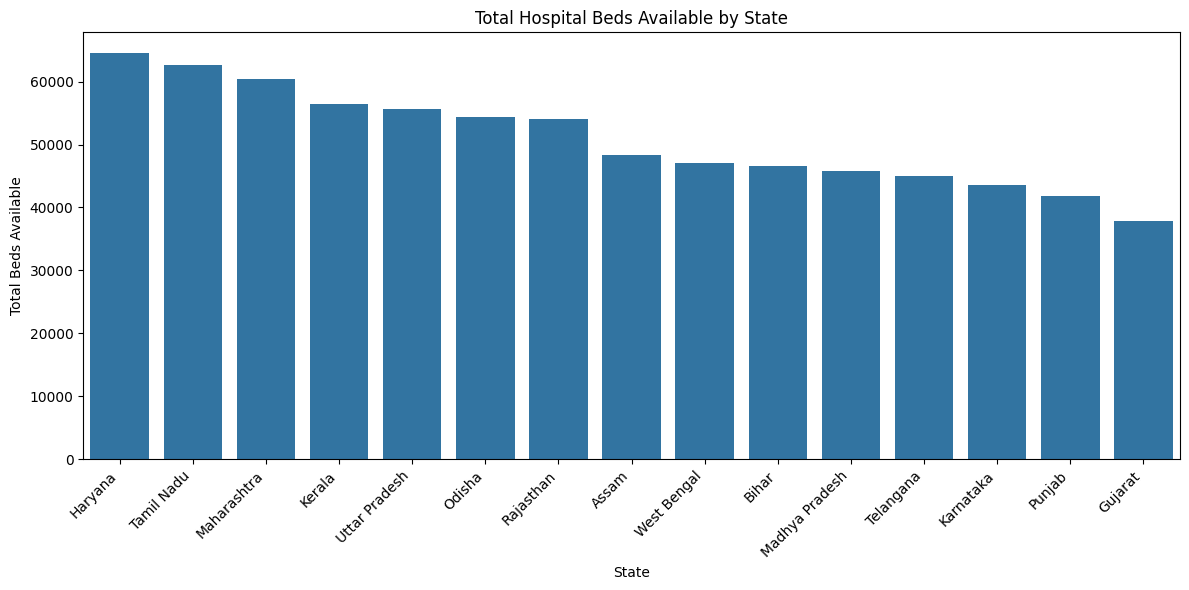

In [3]:
# --- Q5: Plot Bed Availability by State (simple) ---

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Load dataset
file_path = "/content/drive/My Drive/BE/1601-24-737-305/PROJECT/hospital_beds_data.csv"
df = pd.read_csv(file_path)

# 2) Ensure Beds_Available has no NaN (fill with mean)
df['Beds_Available'] = df['Beds_Available'].fillna(df['Beds_Available'].mean())

# 3) Aggregate total beds by state
beds_by_state = df.groupby('State', as_index=False)['Beds_Available'].sum()

# 4) (Optional) Sort by beds so plot is ordered
beds_by_state = beds_by_state.sort_values(by='Beds_Available', ascending=False)

# 5) Plot
plt.figure(figsize=(12,6))
sns.barplot(data=beds_by_state, x='State', y='Beds_Available')
plt.title("Total Hospital Beds Available by State")
plt.xlabel("State")
plt.ylabel("Total Beds Available")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
